# Gradient to Cost Function

## Introduction

In the previous lesson, we learned the mathematical definition of a gradient.  We saw that the gradient of a function was a combination of our partial derivatives with respect to each variable of that function.  We saw the direction of gradient descent was simply to move in the negative direction of the gradient.  For example, if the direction of ascent of a function is a move up and to the right, the descent is down and to the left. In this lesson, we will apply gradient descent to our cost function to see how we can move towards a best fit regression line by changing variables of $m$ and $b$.  

## Objectives
You will be able to:
- Represent RSS as a multivariable function and take partial derivatives to perform gradient descent

## Representing RSS as a multivariable function

Think about why gradient descent applies so well to a cost function.  Initially, we said that the cost of our function, meaning the difference between what our regression line predicted and the dataset, changed as we altered the y-intercept or the slope of the function.

Remember that mathematically, when we say cost function, we use the residual sum of squares where 
$$ 
\begin{align}
RSS &= \sum_{i=1}^n(actual - expected)^2 \\
&= \sum_{i=1}^n(y_i - \hat{y})^2 \\
&= \sum_{i=1}^n(y_i - (mx_i + b))^2
\end{align}
$$ 
for all $x$ and $y$ values of our dataset.  So in the graph directly below, $x_i$ and $y_i$  would be our points representing a movie's budget and revenue.  Meanwhile, $mx_i + b $ is our predicted $y$ value for a given $x$ value, of a budget. 

And RSS takes the difference between $mx_i + b$, the $y_i$ value our regression line (the red line below) predicts, and our actual $y$, and sum up these squares for each piece of data in our dataset.  That is the residual sum of squares.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def regression_formula(x):
    return 1.8 + 46*x

np.random.seed(225)

x = np.random.rand(30,1).reshape(30)
y_randterm = np.random.normal(0,3,30)
y = 3+ 50* x + y_randterm

plt.figure(figsize=(7,5))
plt.plot(x, y, '.b')
plt.plot(x, regression_formula(x), '-', color="red")
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14);

And we when we just plotted how RSS changes as we change one variable of our regression line, $m$ or $b$, we note how this looks like a curve, and call it our cost curve.

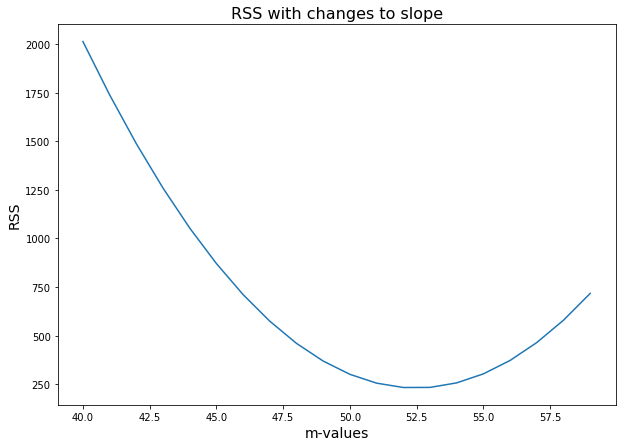

In [2]:
def errors(x_values, y_values, m, b):
    y_line = (b + m*x_values)
    return (y_values - y_line)

def squared_errors(x_values, y_values, m, b):
    return np.round(errors(x_values, y_values, m, b)**2, 2)

def residual_sum_squares(x_values, y_values, m, b):
    return round(sum(squared_errors(x_values, y_values, m, b)), 2)

table = np.zeros((20,2))
for idx, val in enumerate(range(40, 60)):
    table[idx,0] = val
    table[idx,1] = residual_sum_squares(x, y, val, 1.319)
    
plt.figure(figsize=(10,7))
plt.plot(table[:,0], table[:,1], '-')
plt.xlabel("m-values", fontsize=14)
plt.ylabel("RSS", fontsize=14)
plt.title("RSS with changes to slope", fontsize=16);

In two dimensions, we decrease our RSS simply by moving forwards or backwards along the cost curve which is the equivalent of changing our variable, in this case y-intercept.  So the cost curve above indicates that changing the regression line from having a $m$ slope from 42 to 45 decreases our cost, the RSS.

Allowing us to change both variables, $m$ and $b$ means calculating how RSS varies with both $m$ and $b$. 

Because the RSS is a function of how we change our values of $m$ and $b$, we can express this relationship mathematically by saying the cost function, $J$ is the following:  
$$
\begin{align}
J(m, b) & = \sum_{i=1}^{n}(y_i - \hat{y})^2\\
J(m, b) & = \sum_{i=1}^{n}(y_i - (mx_i + b))^2 &&\text{notice $\hat{y} = mx + b$}\\
\end{align}
$$

In the function above, $J$ is a function of $m$ and $b$. $J$ just represents the residual sum of squares, which varies as the $m$ and $b$ variables of our regression line are changed.  

Just our other multivariable functions we have seen thus far, we can display it in three dimensions, and it looks like the following.

<img src="./images/new_gradientdescent.png" width="600">

The three-dimensional graph above shows how the cost associated with our regression line changes as the slope and y-intercept values are changed.  

## Calculating the gradient of our cost function

Let's explore using gradient descent to determine how to change our regression line when we can alter both $m$ and $b$ variables.  When applied to a general multivariable function $f(x,y)$, gradient descent answered how much move the $x$ variable and the $y$ variable to produce the greatest decrease in output.  

> Now that we are applying gradient descent to our cost curve $J(m, b)$, the technique should answer how much to move the $m$ variable and the $b$ variable to produce the greatest decrease in cost, or RSS. In other words, when altering our regression line, we want to know how much of this change should be derived from a move in the slope versus how much should be derived from a change in the y-intercept.

As we know, the gradient of a function is simply the partial derivatives with respect to each of the variables, so:

$$ \nabla J(m, b) = \frac{\delta J}{\delta m}, \frac{\delta J}{\delta b}$$

In calculating the partial derivatives of our function $J(m, b) = \sum_{i=1}^{n}(y_i - (mx_i + b))^2$, **we won't change the result if we ignore the summation until the very end**.  We'll do that to make our calculations easier.

Ok, so let's take our partial derivatives of the following:

$$
\begin{align}
\frac{\delta J}{\delta m}J(m, b) & = \boldsymbol{\frac{\delta J}{\delta m}}(y - (mx + b))^2  &&\text{partial derivative with respect to} \textbf{ m}\\
\\
\frac{\delta J}{\delta b}J(m, b) & = \boldsymbol{\frac{\delta J}{\delta b}}(y - (mx + b))^2  &&\text{partial derivative with respect to} \textbf{ b}\\
\end{align}
$$

You'll notice that taking the partial derivatives of these functions is not that simple. You've learned a set of rules about derivatives in this section, but if you want to take these two derivatives successfully, you'll need to use the **chain rule**. The chain rule is a formula to compute the derivative of a composite function.

The **chain rule** basically tells you how to compute the derivative of nearly _any function_ (or any "molecular" function built up from fundamental "atomic" functions like $sin(x)$ or $e^x$).

In this lesson, we don't want to get lost in the details of the chain rule and how to get to the the partial derivatives needed in this lesson, but in the appendix, you can find:
- a lesson on the chain rule in general
- A lesson that walks you through the details of finding the partial derivatives in this lesson.

The resulting partial derivatives are:

$$
\begin{align}
\frac{\delta J}{\delta m}J(m, b)&= -2x*(y - (mx + b ))
\end{align}
$$

$$
\begin{align}
\frac{\delta J}{\delta b}J(m, b) & = -2*(y - (mx + b))
\end{align}
$$

## Using both of our partial derivatives for gradient descent

Ok, so now we have our two partial derivatives for $\nabla J(m, b)$:

$$ \frac{dJ}{dm}J(m,b) = -2*x(y - (mx + b )) $$
$$ \frac{dJ}{db}J(m,b) = -2*(y - (mx + b)) $$

And as $mx + b$ = is just our regression line, we can simplify these formulas to be: 

$$ \frac{dJ}{dm}J(m,b) = -2*x(y - \hat{y})  = -2x*\epsilon$$
$$ \frac{dJ}{db}J(m,b) = -2*(y - \hat{y}) = -2\epsilon$$

Remember, `error` = `actual` - `expected`, so we can replace $y - \hat{y}$ with $\epsilon$, our error. As we mentioned above, our last step is adding back the summations.  Since $-2$ is a constant, we can keep this outside of the summation.  Our value for $x$ changes depending upon what x value we are at, so it must be included inside the summation for the first equation.  Below, we have: 

$$ \frac{dJ}{dm}J(m,b) = -2*\sum_{i=1}^n x(y_i - \hat{y}_i)  = -2*\sum_{i=1}^n x_i*\epsilon_i$$
$$ \frac{dJ}{db}J(m,b) = -2*\sum_{i=1}^n(y_i - \hat{y}_i) = -2*\sum_{i=1}^n \epsilon_i$$

So that is what what we'll do to find the "best fit regression line."  We'll start with an initial regression line with values of $m$ and $b$.  Then we'll go through our dataset, and we will use the above formulas with each point to tell us how to update our regression line such that it continues to minimize our cost function.

In the context of gradient descent, we use these partial derivatives to take a step size.  Remember that our step should be in the opposite direction of our partial derivatives as we are *descending* towards the minimum.  So to take a step towards gradient descent we use the general formula of:

`current_m` =  `old_m` $ - \frac{dJ}{dm}J(m,b)$

`current_b` =  `old_b` $ - \frac{dJ}{db}J(m,b) $

or in the code that we just calculated:

`current_m` = `old_m` $ -  (-2*\sum_{i=1}^n x_i*\epsilon_i )$

`current_b` =  `old_b` $ - ( -2*\sum_{i=1}^n \epsilon_i )$

In the next lesson, we'll work through translating this technique, with use of our $\nabla J(m, b)$, into code to descend along our cost curve and find the "best fit" regression line.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def regression_formula(x):
    return 1.319 + 52*x

np.random.seed(225)

x = np.random.rand(30,1).reshape(30)
y_randterm = np.random.normal(0,3,30)
y = 3+ 50* x + y_randterm

plt.figure(figsize=(7,5))
plt.plot(x, y, '.b')
plt.plot(x, regression_formula(x), '-', color="red")
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14);

## Summary

In this section, we developed some intuition for why the gradient of a function is the direction of steepest ascent and the negative gradient of a function is the direction of steepest decent.  Essentially, the gradient uses the partial derivatives to see what change will result from changes in the function's dimensions, and then moves in that direction weighted more towards the partial derivative with the larger magnitude.

We also practiced calculating some gradients, and ultimately calculated the gradient for our cost function.  This gave us two formulas that tell us how to update our regression line so that it descends along our cost function and approaches a "best fit line".